In [176]:
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
neg=file=open('neg.txt')
neg=file.read()

In [178]:
stopwords=set(line.strip() for line in open('stopwords.txt')) # 익명함수,클러저

In [179]:
wordcount ={}
for word in neg.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("/","")
    word = word.replace("*","")
    
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1 
        else:
            wordcount[word] += 1 

In [180]:
import collections

In [181]:
word_counter=collections.Counter(wordcount)

In [182]:
word_counter.most_common(20)

[('not', 36),
 ('like', 19),
 ('much', 19),
 ('out', 17),
 ('big', 15),
 ('time', 15),
 ('mars', 14),
 ('too', 13),
 ('bad', 12),
 ('no', 12),
 ('way', 12),
 ('up', 11),
 ('stalked', 11),
 ('pretty', 10),
 ('ghosts', 10),
 ('plot', 9),
 ('your', 9),
 ('audience', 9),
 ("don't", 9),
 ('movies', 9)]

In [183]:
n_print = int(input('how many list:'))
for word, count in word_counter.most_common(n_print):
    print(word,':',count)

how many list: 3


not : 36
like : 19
much : 19


In [184]:
list = word_counter.most_common(n_print)
df = pd.DataFrame(list,columns=['word','Count'])

<AxesSubplot:xlabel='word'>

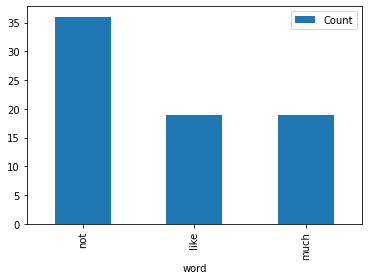

In [185]:
df.plot.bar(x='word',y='Count')

In [186]:
from nltk.tokenize import sent_tokenize ,word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk import Text
from nltk.tag import pos_tag

In [187]:
retokenize =RegexpTokenizer('[\w]+')

In [188]:
text = Text(retokenize.tokenize(neg))
text

<Text: plot two teen couples go to a church...>

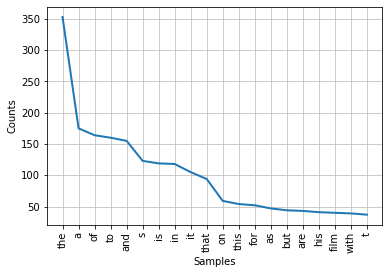

In [189]:
text.plot(20)

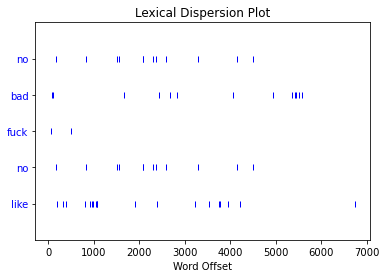

In [190]:
text.dispersion_plot(['no','bad','fuck','no','like'])

In [191]:
pos=file=open('pos.txt')
pos=file.read()

In [192]:
text2 = Text(retokenize.tokenize(pos))
text2

<Text: films adapted from comic books have had plenty...>

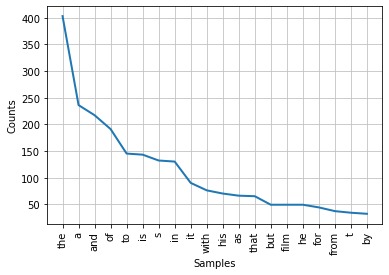

In [193]:
text2.plot(20)

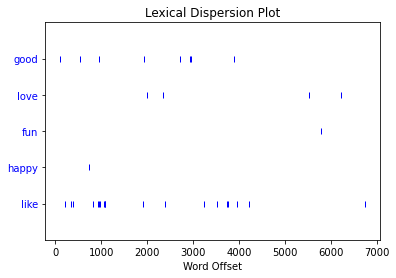

In [194]:
text.dispersion_plot(['good','love','fun','happy','like'])

In [195]:
from nltk import FreqDist
from nltk.tag import pos_tag

In [196]:
neg_tokens = pos_tag(retokenize.tokenize(neg))

In [197]:
names_list = [t[0] for t in neg_tokens if t[1] == "NN" and t[0] not in stopwords]
fd_names = FreqDist(names_list)
fd_names.N()

1303

In [198]:
fd_names.most_common(5)

[('time', 16), ('way', 13), ('audience', 10), ('plot', 9), ('story', 8)]

In [199]:
pos_tokens = pos_tag(retokenize.tokenize(pos))

In [200]:
names_list = [t[0] for t in pos_tokens if t[1] == "NN" and t[0] not in stopwords]
fd_names2 = FreqDist(names_list)
fd_names2.N()

1509

In [208]:
fd_names2.most_common(5)

[('performance', 17),
 ('story', 17),
 ('shark', 16),
 ('time', 13),
 ('lumumba', 13)]

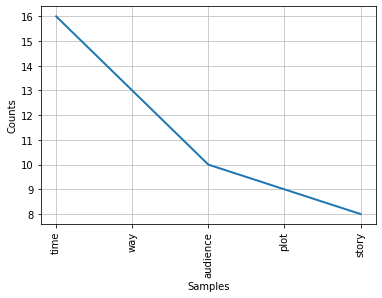

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [206]:
fd_names.plot(5)

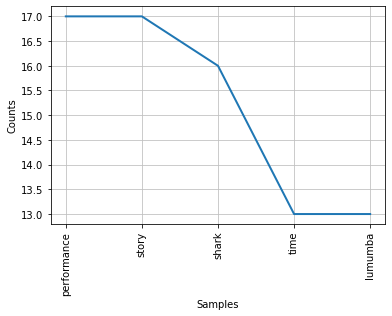

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [207]:
fd_names2.plot(5)

In [209]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

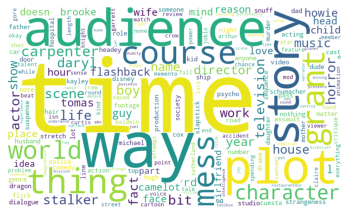

In [210]:
wc=WordCloud(width=1000, height=600, background_color='white',random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis('off')
plt.show()

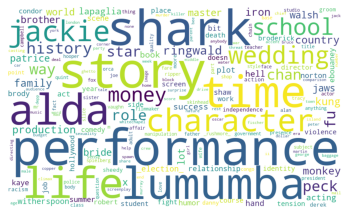

In [211]:
wc=WordCloud(width=1000, height=600, background_color='white',random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names2))
plt.axis('off')
plt.show()